# Data Mining Homework #2
### Student: 楊凱期 (0556078)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.cross_validation import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_curve, roc_auc_score, confusion_matrix)
from scipy.spatial import distance
import itertools

%matplotlib inline

In [2]:
dataset = pd.read_excel('./dataset.xls', header=1)
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Problem 1
Split the data randomly to training data and test data ( 70% / 30% )

In [3]:
tt_ratio = 0.7
data_train, data_test = train_test_split(dataset, train_size = tt_ratio, random_state = int(datetime.now().timestamp()))

#data_train = data_train.sort("ID")
#data_test = data_test.sort("ID")
x_train = data_train.drop(['ID', 'default payment next month'], axis=1)
y_train = data_train['default payment next month']
x_test = data_test.drop(['ID', 'default payment next month'], axis=1)
y_test = data_test['default payment next month']

ds_list = [(x_train, "train x"), (y_train, "train y"), (x_test, "test x"), (y_test, "test y")]
print("The shape of each data set")
for ds, ds_name in ds_list:
    print("{0} : {1}".format(ds_name, ds.shape))

The shape of each data set
train x : (21000, 23)
train y : (21000,)
test x : (9000, 23)
test y : (9000,)


### Problem 2
What is the accuracy of (1) Logistic Regression (2) k-Nearest Neighbors (3) Naive Bayes (4) Random Forest (5) SVM model in test data

In [4]:
clfs = [
    (LogisticRegression(), "Logistic Regression"),
    (KNeighborsClassifier(), "k-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes"),
    (RandomForestClassifier(), "Random Forest"),
    (SVC(), "SVM")
]

print("Compare Accuracy")
for clf, method in clfs:
    clf.fit(x_train, y_train)
    result = clf.predict(x_test)
    print(method, ":", accuracy_score(result, y_test))

Compare Accuracy
Logistic Regression : 0.776888888889
k-Nearest Neighbors : 0.756555555556
Naive Bayes : 0.377444444444
Random Forest : 0.804222222222
SVM : 0.776111111111


### Problem 3
Draw the ROC curve in Logistic Regression

In [16]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_score = clf.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

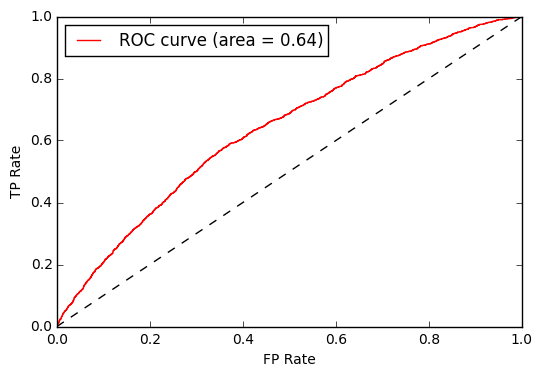

In [17]:
plt.figure(1)
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score), color='r')
plt.legend(loc='best')
plt.show()

In [18]:
y_score

array([-0.54, -2.23, -0.77, ..., -0.64, -1.15, -0.48])

### Problem 4
Calculate the precision and recall in k-Nearest Neighbors

In [6]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('precision: {:.5f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.5f}'.format(recall_score(y_test, y_pred)))

precision: 0.39978
recall: 0.18177


### Problem 5
Draw the Confusion Matrix of Naive Bayes

Confusion matrix, without normalization
[[1590 5402]
 [ 201 1807]]


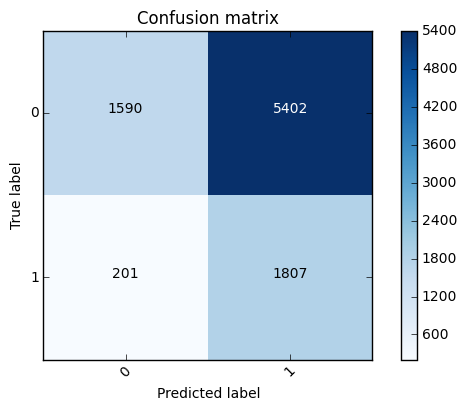

In [7]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1])
plt.show()

### Problem 6

In [ ]:
kernels = ['rbf','linear','poly','sigmoid']
for ker in kernels:
    clf = SVC(kernel = ker)
    clf.fit(x_train, y_train)
    result = clf.predict(x_test)
    print(ker, ":", accuracy_score(result, y_test))

## Problem 7
According to Gender, Education, and Marital status, how many kinds of customer should be divided into?

In [10]:
points = dataset[['SEX', 'EDUCATION', 'MARRIAGE']]
num_points = points.shape[0]

clf = KMeans(n_clusters=3)
clf.fit(points)

dd = [0]*10
clf.cluster_centers_
for i in range(1, 11):
    clf.labels_
    clf = KMeans(n_clusters=i)
    clf.fit(points)

    for j in range(0, num_points):
        dd[i-1] += ((points.values[j] - clf.cluster_centers_[clf.labels_[j]])**2).sum()
        #dd[i-1] += distance.euclidean(points.values[j], clf.cluster_centers_[clf.labels_[j]])

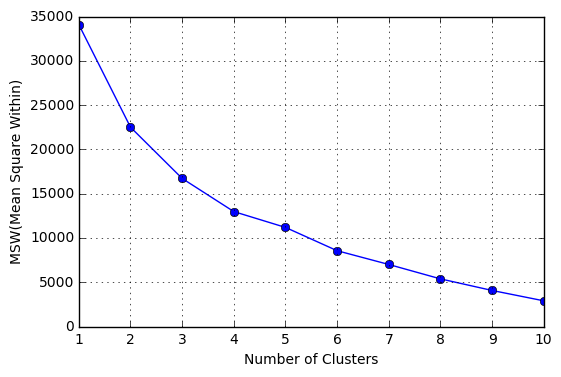

In [11]:
plt.grid(True)
plt.plot(dd, marker='o')
plt.xticks(range(10), range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('MSW(Mean Square Within)')

我使用 Mean Square Within 來分析 k 對分群的效果，公式簡單表示為
$$MSE =\frac{ \sum\limits_{i} \sum\limits_{j \in C_{i}}(X_{ij} - \bar{X}_{i})^2}{n-k}$$

其中我認為k的取值為 3 or4，  
因為k取值愈大，會發現MSE的曲線幅度降低，所以分群效果並沒有顯著提升。

## Problem 8
Feel free and try more ^_^  

這部份我選擇的是 Neural network models，根據不同參數設定下做測試。

In [15]:
from sklearn.neural_network import MLPClassifier

In [25]:
solvers = ['lbfgs', 'sgd', 'adam']
elements = [5, 15, 25]
layers = [5, 10]

acc_table = pd.DataFrame(columns=["Method", "Accuracy"])

for slv in solvers:
    print("solver:{}".format(slv))
    for ele in elements:
        for lyr in layers:
            clf = MLPClassifier(solver=slv, alpha=1e-5,hidden_layer_sizes=(ele, lyr), random_state=1)
            clf.fit(x_train, y_train) 
            result = clf.predict(x_test)
            print("hidden layer ({0}, {1}), accuracy : {2:.5f}".format(ele, lyr, accuracy_score(result, y_test)))
    


solver:lbfgs
hidden layer (5, 5), accuracy : 0.55344
hidden layer (5, 10), accuracy : 0.76978
hidden layer (15, 5), accuracy : 0.23644
hidden layer (15, 10), accuracy : 0.78200
hidden layer (25, 5), accuracy : 0.78200
hidden layer (25, 10), accuracy : 0.76611
solver:sgd
hidden layer (5, 5), accuracy : 0.78200
hidden layer (5, 10), accuracy : 0.78200
hidden layer (15, 5), accuracy : 0.78211
hidden layer (15, 10), accuracy : 0.78211
hidden layer (25, 5), accuracy : 0.78211
hidden layer (25, 10), accuracy : 0.78211
solver:adam
hidden layer (5, 5), accuracy : 0.73844
hidden layer (5, 10), accuracy : 0.78222
hidden layer (15, 5), accuracy : 0.78178
hidden layer (15, 10), accuracy : 0.68122
hidden layer (25, 5), accuracy : 0.78189
hidden layer (25, 10), accuracy : 0.76522


以上是對於不同的 solver 與 hidden layer size 對正確率的影響

In [42]:
acc = [0]*11
for lyr in range(2,11):
    clf = MLPClassifier(solver=slv, alpha=1e-5,hidden_layer_sizes=(5, lyr), random_state=1)
    clf.fit(x_train, y_train) 
    result = clf.predict(x_test)
    acc[lyr] = accuracy_score(result, y_test)

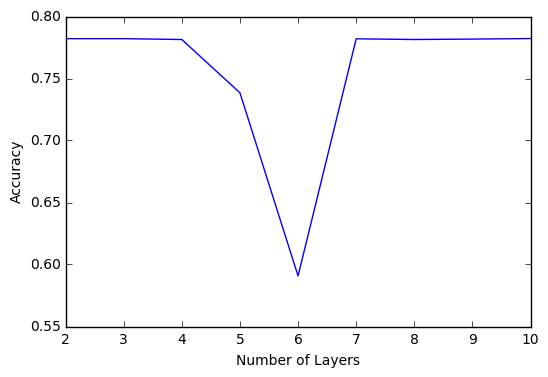

In [47]:
plt.plot(acc[2:11])
plt.xticks(range(9), range(2, 11))
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')

以上是固定 element 為 5 的情況下，Accuracy 的變動情形

In [59]:
acc = [0]*11
for lyr in range(2,11):
    clf = MLPClassifier(solver=slv, alpha=1e-5,hidden_layer_sizes=(15, lyr), random_state=1)
    clf.fit(x_train, y_train) 
    result = clf.predict(x_test)
    acc[lyr] = accuracy_score(result, y_test)

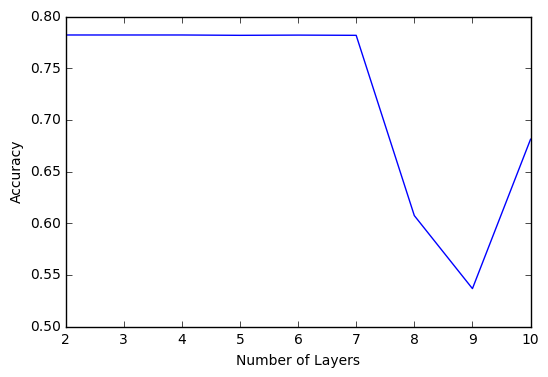

In [60]:
plt.plot(acc[2:11])
plt.xticks(range(9), range(2, 11))
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')

以上是固定 element 為 15 的情況下，Accuracy 的變動情形

In [61]:
acc = [0]*20
for t in range(0,20):
    clf = MLPClassifier(solver=slv, alpha=1e-5,hidden_layer_sizes=(15, 5), random_state=int(datetime.now().timestamp()))
    clf.fit(x_train, y_train) 
    result = clf.predict(x_test)
    acc[t] = accuracy_score(result, y_test)

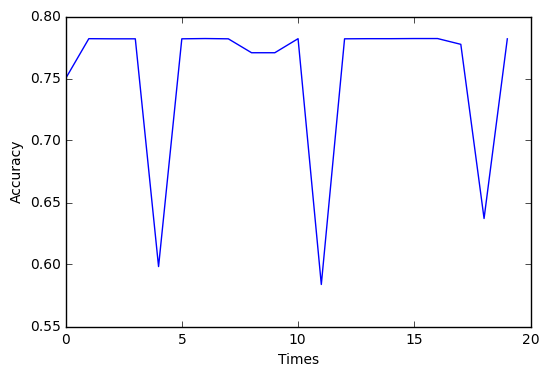

In [62]:
plt.plot(acc)
plt.xlabel('Times')
plt.ylabel('Accuracy')

以上是固定 hidden_layer_sizes = (15,5) 的情形下，不同 random_state 對 Accuracy 的影響。

In [63]:
acc = [0]*20
for t in range(0,20):
    clf = MLPClassifier(solver=slv, alpha=1e-5,hidden_layer_sizes=(100, 50), random_state=int(datetime.now().timestamp()))
    clf.fit(x_train, y_train) 
    result = clf.predict(x_test)
    acc[t] = accuracy_score(result, y_test)

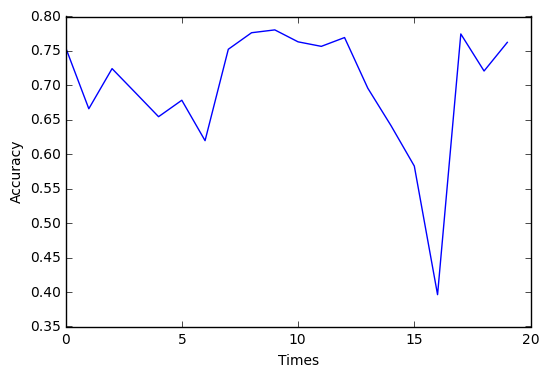

In [64]:
plt.plot(acc)
plt.xlabel('Times')
plt.ylabel('Accuracy')

以上是固定 hidden_layer_sizes = (100,50) 的情形下，不同 random_state 對 Accuracy 的影響。

原本認為在 hidden_layer_sizes 夠大的情形下，建模的準確率應該會趨於穩定，  
但是結果確反而更不穩定，這個部份我目前還不知道緣由，  
這也許是我未來能深入了解的地方。

###### 結論：
針對 hidden_layer_sizes 參數的設定目前沒有得到較好的準則，  
以前面的實驗來說，愈多的 elements 並未代表著愈高的 Accuracy，而愈多的 layers 也未必代表愈高的 Accuracy。